In [2]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Normalization
from tensorflow.keras.preprocessing import image, image_dataset_from_directory

In [3]:
train_ds= image_dataset_from_directory('dataset/Training', subset='training', seed = 12,
                                       validation_split = 0.1, batch_size=32,
                                       image_size = (512,512))

Found 70 files belonging to 2 classes.


Using 63 files for training.


In [4]:
val_ds= image_dataset_from_directory('dataset/Training', subset='validation', seed = 12,
                                       validation_split = 0.1, batch_size=32,
                                       image_size = (512,512))

Found 70 files belonging to 2 classes.
Using 7 files for validation.


In [5]:
test_ds= image_dataset_from_directory('dataset/Testing', seed = 12,
                                       batch_size=32,
                                       image_size = (512,512))

Found 21 files belonging to 2 classes.


In [6]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = train_ds.prefetch(buffer_size=AUTOTUNE)

In [7]:
vgg16_net= VGG16(weights='imagenet', include_top=False, input_shape=(512,512,3))
vgg16_net.trainable = False

In [8]:
model = Sequential()
model.add(Normalization(input_shape=(512,512,3)))
model.add(vgg16_net)
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))


c:\Python311\Lib\site-packages\keras\src\layers\preprocessing\normalization.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 512, 512, 3)    │             7 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 16, 16, 512)    │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    67,109,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 82,087,753 (313.14 MB)

 Trainable params: 67,373,058 (257.01 MB)

 Non-trainable params: 14,714,695 (56.13 MB)

In [26]:
history = model.fit(train_ds, validation_data=val_ds, epochs=10) 

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 47s 35s/step - accuracy: 0.9684 - loss: 1.3681 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 46s 34s/step - accuracy: 0.9788 - loss: 0.6445 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 45s 33s/step - accuracy: 0.9790 - loss: 0.0181 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 46s 33s/step - accuracy: 0.9790 - loss: 0.5890 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 46s 34s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 47s 34s/step - accuracy: 0.9580 - loss: 0.1828 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 47s 35s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 49s 36s/step - accuracy: 1.0000 - loss: 3.4795e-07 - 

In [27]:
scores = model.evaluate(test_ds, verbose=1)
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

2/2 ━━━━━━━━━━━━━━━━━━━━ 24s 12s/step - accuracy: 1.0000 - loss: 0.0000e+00
Доля верных ответов на тестовых данных, в процентах: 100.0


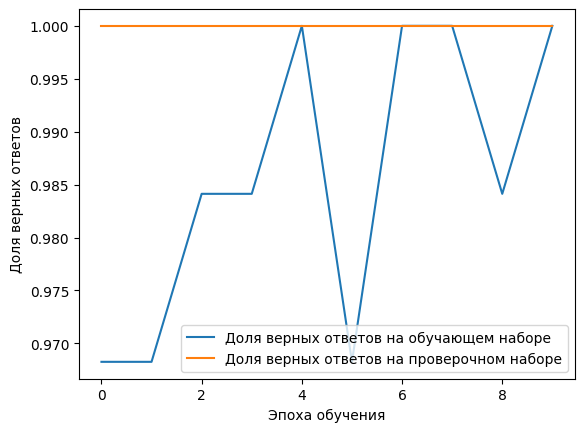

In [28]:
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

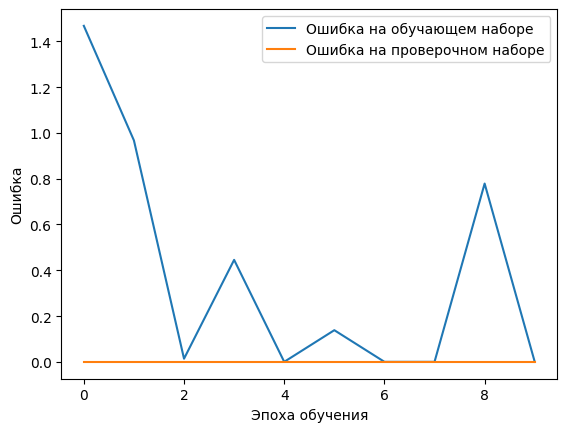

In [29]:
plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

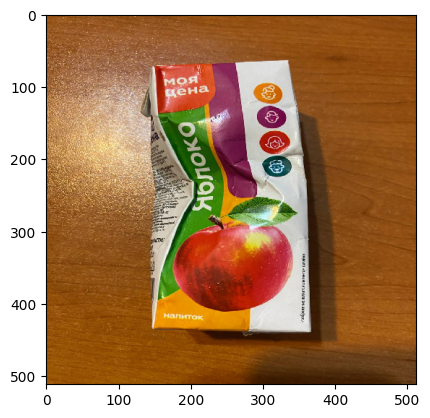

In [45]:
im1 = image.load_img('0.jpg', target_size=(512,512))
plt.imshow(im1)

In [46]:
im1 = image.img_to_array(im1)
im1 = np.expand_dims(im1, axis = 0)
pr = model.predict(im1)
pr

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[1., 0.]], dtype=float32)

In [47]:
prob = tf.nn.softmax(pr)
predict = np.argmax(prob , axis = 1)
predict

array([0], dtype=int64)

In [50]:
model.save('the_integrity_of_the_box.keras')